In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid") # plt.style.available # komutu ile tüm plot style lerini görüntüleyebiliriz.

import seaborn as sns

from collections import Counter

%matplotlib qt5

import warnings
warnings.filterwarnings("ignore")

# 1- Load and Check Data

In [7]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
test_PassengerId = test_df["PassengerId"] # ML derslerinde kullanacağız.

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2- Variable Description
1. PassengerId: unique id number to each passenger
1. Survived: passenger survive(1) or died(0)
1. Pclass: passenger class
1. Name: name
1. Sex: gender of passenger 
1. Age: age of passenger 
1. SibSp: number of siblings/spouses
1. Parch: number of parents/children 
1. Ticket: ticket number 
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

## A) Categorical Variable
2 ya da daha fazla kategoriden oluşan featurelardır.

In [21]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varFreq = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varFreq.index, varFreq)
    plt.xticks(varFreq.index, varFreq.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varFreq))
    

 - Survived: 549=0, 342=0 => veriseti yarı yarıya değil. Yani bu veriseti dengeli bir veriseti değil diyebiliriz.
 - Sex: 549=0, 342=0 => veriseti yarı yarıya değil. Yani bu veriseti dengeli bir veriseti değil diyebiliriz. Ancak yeni bir veri geldi bu kişi erkek mi kadın mı diye sorulduğunda yüksek oranda erkektir diyebiliriz.

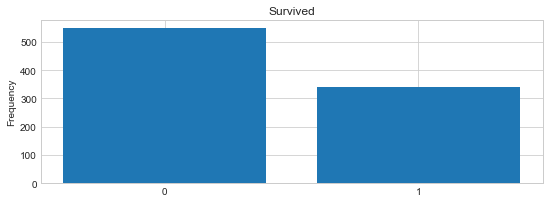

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


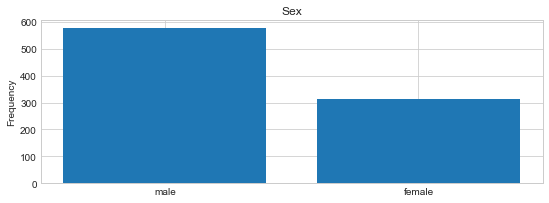

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


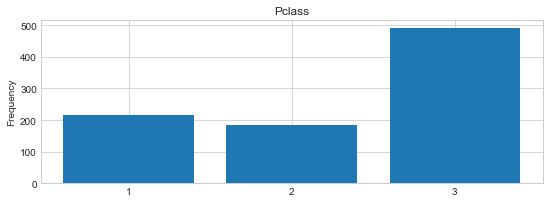

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


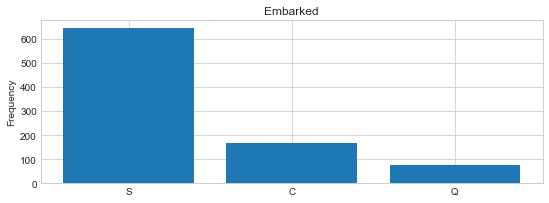

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


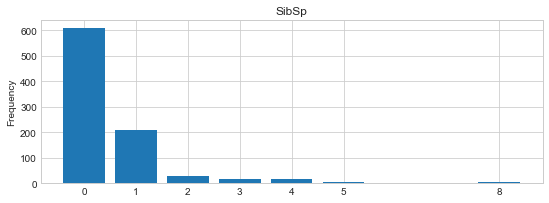

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


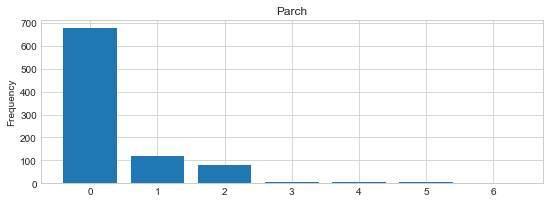

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [27]:
%matplotlib inline
category1 = ["Survived", "Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [29]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



## B) Numerical Variable
Kategoriye ayrılmayan, yaş, fiyat, id gibi numeric ifadelerdir.

In [30]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

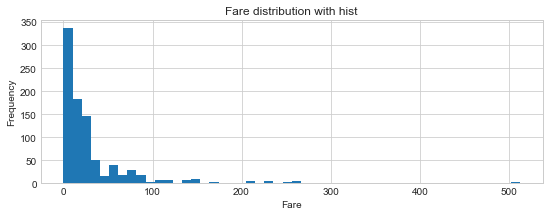

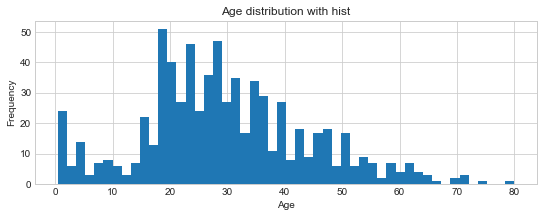

In [31]:
numericVar = ["Fare", "Age"]
for n in numericVar:
    plot_hist(n)

# 3- Basic Data Analysis

Bazı featureların birbirleriyle olan ilişkileri incelenecek. Bunlar:

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [37]:
train_df[["Pclass","Survived"]].head() # istenilen columnları yazıdırma

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


- Pclass: 1 olan yolcuların Survived(hayatta kalma) olasılığı 0.62
- Pclass: 2 olan yolcuların Survived(hayatta kalma) olasılığı 0.47
- Pclass: 3 olan yolcuların Survived(hayatta kalma) olasılığı 0.24

Bu sonuçlara bakarak Pclass sınıfının Survived ile mantıksal olarak doğru orantılı bir ilişkisi vardır, diyebiliriz.

In [39]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending = False) #as_index = False => indexleri print eder

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- Yolcu kadın ise hayatta kalma olasılığı bir hayli yüksektir yorumu yapılabilir.

In [41]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [43]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [44]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# 4- Outlier Detection

Veriyi bozan, alakasız değerlerden (**outlier**) kurtulmamız gerekli.


In [50]:
array1 = np.array([1,2,3,4,5,100])
array1.mean()

19.166666666666668

Eğer **100** sayısı olmasaydı, onun yerine **6** sayısı olsaydı, ortalama bir hayli küçülecekti. **100** burada **outlier** bir değerdir, outlierdan kurtulmamız gerekir.

In [51]:
array1 = np.array([1,2,3,4,5,6])
array1.mean()

3.5

Tek bir outlierı çıkarmak doğru olmaz, 2 den fazla olmalı.

In [52]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:

        # 1st quartile
        Q1 = np.percentile(df[c],25)

        # 3rd quartile
        Q3 = np.percentile(df[c],75)

        # IQR
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = IQR * 1.5

        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [54]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])] #print outliers for age, sissp, parch and fare features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [55]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

#  5- Missing Value
Train verilerinin yanında test verilerinin de missing value larına bakılması lazım. O yüzden şimdilik bu 2 veri birleştirilecektir. İkisi birlikte halledilecektir.
* Find Missing Value
* Fill Missing Value

In [56]:
train_df_len = len(train_df) # train'in uzunluğunu saklamak gerekir.
train_df = pd.concat([train_df, test_df],axis = 0).reset_index(drop = True)

In [57]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## A- Find Missing Value

In [58]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

- Şu anda **Age** feature unu doldurmuyoruz. Analiz etmemiz gerekiyor.
- **Cabin** bilgisi bizi ilgilendirmiyor.
- 
- Yalnızca **Embarked** ve **Fare** değerlerini dolduracağız.

In [63]:
train_df.isnull().sum() # Örneğin 256 adet yolcunun yaş değeri bilinmiyor.

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

## B- Fill Missing Value

**PClass** ya da **Fare**'leri eşit olduğu için bu sınıfa ait kişlerin **Embarked** değerleri ne ise onlarla doldurabiliriz.

* Embarked has 2 missing value
* Fare has only 1

In [64]:
train_df[train_df["Embarked"].isnull()] # print null values of Embarked feature.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


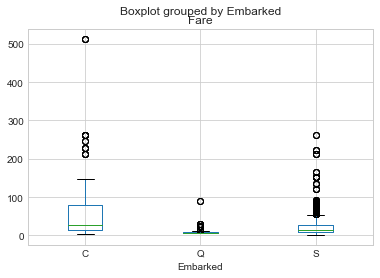

In [66]:
train_df.boxplot(column="Fare", by = "Embarked") #80 civarı olduğu için plotta, y eksenine denk gelen x ekseni olan C limanı ile doldururuz.
plt.show()

In [67]:
train_df["Embarked"] = train_df["Embarked"].fillna("C") # filled missing values
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [68]:
train_df[train_df["Fare"].isnull()] #Pclass ve Embarked ile yorumlanabilir

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [70]:
train_df[train_df["Pclass"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [71]:
train_df[train_df["Pclass"] == 3]["Fare"] # Sadece fare column'una bakmak için 

0        7.2500
2        7.9250
4        8.0500
5        8.4583
7       21.0750
         ...   
1293     7.7750
1294     8.0500
1296     7.2500
1297     8.0500
1298    22.3583
Name: Fare, Length: 702, dtype: float64

In [73]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"]) # 3.sınıftaki yolcular ortalama ne kadar ödemişler?

12.741219971469327

In [74]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"])) # 12.74 ortalama değerle doldururuz

In [75]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
